In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import t
from math import sqrt 
import seaborn as sns

#### **Read the dataset**

In [6]:
link='http://bit.ly/3C8JzrM'
dataset=pd.read_csv(link)

In [7]:
dataset.head()

,x,y
0,1,-13.115843
1,2,25.806547
2,3,-5.017285
3,4,20.256415
4,5,4.075003


#### **Exercise 1**:
Perform a simple linear regression to find the $m$ and $b$ values that minimizes the loss (sum of squares).

m: [1.]
b: [-1.42108547e-14]


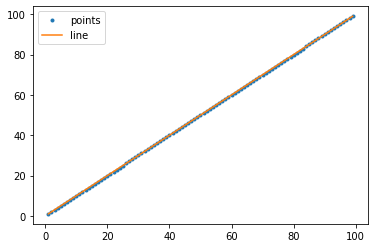

In [18]:
df = pd.read_csv(link,delimiter=',')

X = df.values[:,:-1]
Y = df.values[:,:-1]
fit = LinearRegression().fit(X,Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f"m: {m}")
print(f"b: {b}")

plt.plot(X,Y,'.')
plt.plot(X,m*X+b)
plt.legend(['points','line'])
plt.show()

#### **Exercise 2**:
Calculate the correlation coefficient and statistical significance of this data (at 95% confidence). Is the correlation useful?

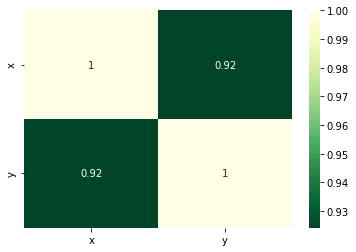

In [20]:
data = pd.read_csv(link,delimiter=',')
correlations=data.corr(method='pearson')
sns.heatmap(data=correlations,annot=True,cmap='YlGn_r')

In [25]:
n = df.shape[0]
lower_cv=t(n-1).ppf((1-0.95)/2)
upper_cv=t(n-1).ppf((1+0.95)/2)
r = correlations["y"]["x"]
test_value = r/sqrt((1 - r**2)/(n-2))
test_value=r/sqrt((1-r**2)/(n-2))
print(f"TEST VALUE:{test_value}")
print(f"CRITICAL RANGE:{lower_cv,upper_cv}")

if test_value<lower_cv or test_value>upper_cv:
  print("CORRELATION PROVEN, REJECT H0")
else:
  print("CORRELATION NOT PROVEN, FAILED TO REJECT H0")

if test_value > 0:
  p_value = 1.0 - t(n-1).cdf(test_value)
else:
  p_value = t(n-1).cdf(test_value)
#two tailed test so multiply by 2
p_value=p_value*2 
print(f"P-VALUE:{p_value}")

TEST VALUE:23.835515323677328
CRITICAL RANGE:(-1.984467454426692, 1.984467454426692)
CORRELATION PROVEN, REJECT H0
P-VALUE:0.0


#### **Exercise 3**:

If I predict where x = 50, what is the 95% prediction interval for the predicted value of y?

In [28]:
import pandas as pd
from scipy.stats import t
from math import sqrt

points =  list(pd.read_csv(link,delimiter=',').itertuples())

n = len(points)
m = 1.75919315
b = 4.69359655

x_0 =  50
x_mean = sum(p.x for p in points)/len(points) 

t_value = t(n-2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b))**2 for p in points)/(n-2))
margin_of_error = t_value * standard_error * sqrt(1+(1/n)+(n*((x_0+x_mean)**2))/(n*(sum(p.x**2 for p in points)-(sum(p.x for p in points))**2)))

predicted_y = m*x_0 + b

print(f'The prediction interval is between:{predicted_y-margin_of_error} and {predicted_y+margin_of_error}')

The prediction interval is between:50.80065904646458 and 134.50584905353543


#### **Exercise 4**:

Start your regression over and do a train/test split. Feel free to experiment with cross-validation and random-fold validation. Does the linear regression perform well and consistently on the testing data?

In [33]:
df = pd.read_csv(link,delimiter=',')
X = df.values[:,:-1]
Y = df.values[:,:-1]
kfold = KFold(n_splits=3,random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model,X,Y, cv = kfold)
print(results) 
print(f"MSE: {results.mean()}, std_dev: {results.std()}")

[1. 1. 1.]
MSE: 1.0, std_dev: 0.0
